In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [60]:
start = '2019-01-01'
end = '2024-11-25'
stock = 'GOOG'

df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [61]:
df.to_csv('GOOG.csv')

In [62]:
df=pd.read_csv('GOOG.csv')

In [63]:
df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-02 00:00:00+00:00,52.164390563964844,52.29249954223633,52.61600112915039,50.785499572753906,50.82849884033203,30652000
3,2019-01-03 00:00:00+00:00,50.67854309082031,50.803001403808594,52.8489990234375,50.70349884033203,52.04999923706055,36822000
4,2019-01-04 00:00:00+00:00,53.40434646606445,53.535499572753906,53.54199981689453,51.37089920043945,51.62950134277344,41878000


In [64]:
df.tail()

,Price,Adj Close,Close,High,Low,Open,Volume
1482,2024-11-18 00:00:00+00:00,176.8000030517578,176.8000030517578,176.91000366210938,174.4199981689453,174.9550018310547,18725400
1483,2024-11-19 00:00:00+00:00,179.5800018310547,179.5800018310547,180.1699981689453,175.11599731445312,175.23500061035156,15392900
1484,2024-11-20 00:00:00+00:00,177.3300018310547,177.3300018310547,179.11000061035156,175.3300018310547,178.8300018310547,15729800
1485,2024-11-21 00:00:00+00:00,169.24000549316406,169.24000549316406,175.5800018310547,165.30999755859375,175.4550018310547,38839400
1486,2024-11-22 00:00:00+00:00,166.57000732421875,166.57000732421875,168.26499938964844,165.7100067138672,167.16000366210938,24474600


In [65]:
df1=df.reset_index()['Close']

In [66]:
df1.shape

(1487,)

In [67]:

df1 = df1.iloc[2:].reset_index(drop=True)  # Keep rows from index 2 onwards, reset index

# Drop rows with NaN (if any remain)
df1.dropna(inplace=True)

In [68]:
#import matplotlib.pyplot as plt
print(df1.head())
print(df1.dtypes)


0     52.29249954223633
1    50.803001403808594
2    53.535499572753906
3    53.419498443603516
4     53.81399917602539
Name: Close, dtype: object
object


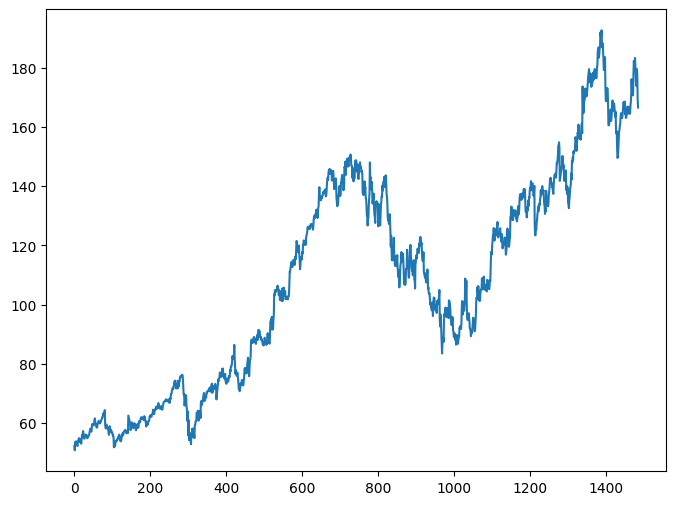

In [69]:
df1 = df1.astype(float)

plt.figure(figsize=(8,6))
plt.plot(df1)

In [70]:
print(df1.head())
print(df1.dtypes)


0    52.292500
1    50.803001
2    53.535500
3    53.419498
4    53.813999
Name: Close, dtype: float64
float64


LSTM are sensitive to the scale of the data. so we apply MinMax scaler.

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [72]:
print(df1)

[[0.0105    ]
 [0.        ]
 [0.01926234]
 ...
 [0.89193341]
 [0.83490418]
 [0.81608242]]


splitting dataset

In [73]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [74]:
training_size,test_size

(965, 520)

In [75]:
train_data

array([[0.0105    ],
       [0.        ],
       [0.01926234],
       [0.01844461],
       [0.02122558],
       [0.0206546 ],
       [0.0191284 ],
       [0.01449699],
       [0.01009114],
       [0.02153222],
       [0.02287866],
       [0.02602619],
       [0.02897282],
       [0.01919538],
       [0.02097534],
       [0.02038672],
       [0.02641039],
       [0.0190403 ],
       [0.01570593],
       [0.02573012],
       [0.03535602],
       [0.03337514],
       [0.04114706],
       [0.0457961 ],
       [0.03495421],
       [0.02913145],
       [0.02784492],
       [0.02782731],
       [0.03711836],
       [0.03669187],
       [0.03722409],
       [0.0343973 ],
       [0.03612793],
       [0.03445017],
       [0.02851814],
       [0.03324122],
       [0.03289933],
       [0.03491896],
       [0.03524324],
       [0.03660727],
       [0.04403377],
       [0.04643407],
       [0.0514497 ],
       [0.04997991],
       [0.04484798],
       [0.04450256],
       [0.05628906],
       [0.062

In [76]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [77]:
time_step = 100
X_train, y_trian = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [78]:
print(X_train.shape), print(y_trian.shape)

(864, 100)
(864,)


(None, None)

In [79]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [81]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\sudar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [82]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [83]:
model.fit(X_train,y_trian,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 145ms/step - loss: 0.0483 - val_loss: 0.0462
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0058 - val_loss: 0.0139
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0017 - val_loss: 0.0026
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0012 - val_loss: 0.0027
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0012 - val_loss: 0.0026
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - loss: 0.0012 - val_loss: 0.0029
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0011 - val_loss: 0.0040
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 0.0012 - val_loss: 0.0025
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0011 - val_loss: 0.0040
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0012 - val_loss: 0.0027
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/st

In [84]:

import tensorflow as tf

In [85]:
tf.__version__

'2.17.0'

In [86]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step


In [87]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [88]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_trian,train_predict))

103.25898081497157

In [89]:
math.sqrt(mean_squared_error(ytest,test_predict))

148.24892963571332

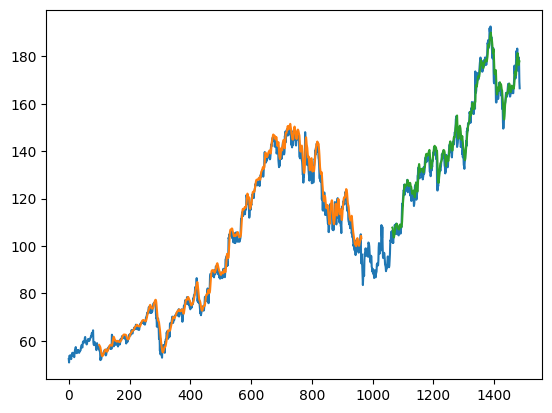

In [90]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [91]:

len(test_data)

520

In [114]:
x_input=test_data[420:].reshape(1,-1)
x_input.shape

(1, 100)

In [115]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [116]:
temp_input

[0.9950654748295923,
 0.9846323558240654,
 0.9843504290562913,
 1.0,
 0.9622154668079635,
 0.9585497734394114,
 0.9684893861456066,
 0.9495266109664996,
 0.929224441620157,
 0.905256686469844,
 0.9064550634709015,
 0.9343705463221222,
 0.9361328844233096,
 0.87106728428098,
 0.8343402184884047,
 0.8309564518876266,
 0.8482274513309261,
 0.8533734484683099,
 0.86246706574202,
 0.8575325405716122,
 0.8289826418194636,
 0.7742797058818626,
 0.7735747276155552,
 0.7750551389489683,
 0.7968376120641424,
 0.807764129804419,
 0.7976130451312479,
 0.8115707327745677,
 0.7840783014218801,
 0.7921145588607105,
 0.8031820937671651,
 0.8289826418194636,
 0.8329303695203712,
 0.8235547179143056,
 0.8084691080707266,
 0.8221447613816907,
 0.8256694375840651,
 0.8147430274083697,
 0.8014902104667759,
 0.7937358797957198,
 0.805790319736256,
 0.7599695291053893,
 0.7543300256686739,
 0.7598990743045909,
 0.7142897556407001,
 0.6960318511633191,
 0.6993450553987174,
 0.7144306652422966,
 0.738327965591

In [117]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8546502]
101
1 day input [0.98463236 0.98435043 1.         0.96221547 0.95854977 0.96848939
 0.94952661 0.92922444 0.90525669 0.90645506 0.93437055 0.93613288
 0.87106728 0.83434022 0.83095645 0.84822745 0.85337345 0.86246707
 0.85753254 0.82898264 0.77427971 0.77357473 0.77505514 0.79683761
 0.80776413 0.79761305 0.81157073 0.7840783  0.79211456 0.80318209
 0.82898264 0.83293037 0.82355472 0.80846911 0.82214476 0.82566944
 0.81474303 0.80149021 0.79373588 0.80579032 0.75996953 0.75433003
 0.75989907 0.71428976 0.69603185 0.69934506 0.71443067 0.73832797
 0.75827765 0.76264832 0.77174193 0.77547808 0.79260807 0.80247712
 0.79140969 0.79542776 0.79084573 0.79676716 0.80705915 0.82045299
 0.82912366 0.82129887 0.820594   0.83011056 0.80071478 0.80994941
 0.79133913 0.79218501 0.80163123 0.81453156 0.81840861 0.8172808
 0.80156067 0.80536738 0.81065439 0.81784476 0.80134919 0.80170168
 0.81904314 0.8285597  0.84829791 0.88354467 0.85922442 0.85894239
 0.84505516 0.85020126 0.89898277 0

In [118]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [119]:
len(df1)

1485

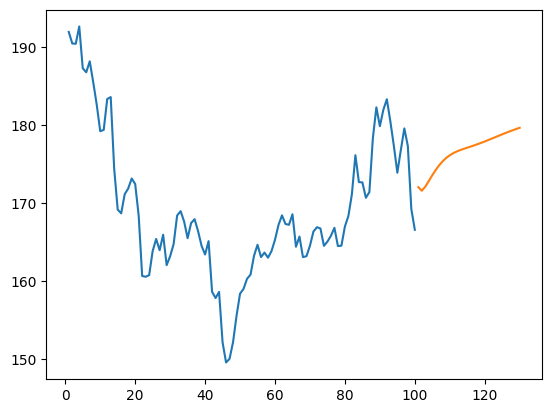

In [120]:
plt.plot(day_new,scaler.inverse_transform(df1[1385:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

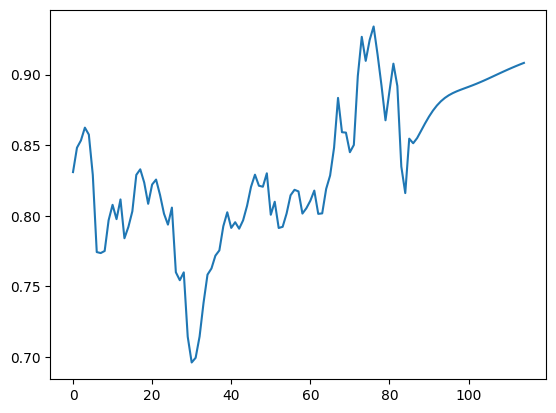

In [121]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1400:])

In [122]:
df3=scaler.inverse_transform(df3).tolist()

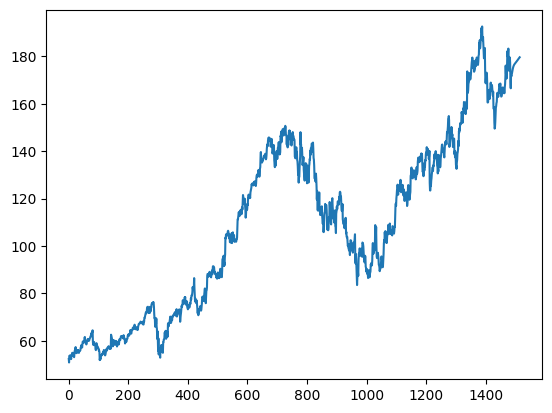

In [123]:
plt.plot(df3)

In [107]:
df3=scaler.inverse_transform(df3).tolist()

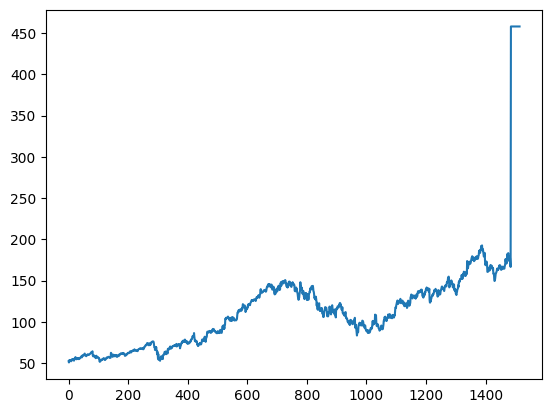

In [108]:
plt.plot(df3)

In [124]:
model.save('Stock Predictions Model1.keras')